<a href="https://colab.research.google.com/github/JMQuinones/DS-ML/blob/master/notebooks/practica_segundo_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica Segundo Parcial**
* ### **Grupo 4**

* ### **Integrantes**



1.   Orellana Espinoza, Elizabeth Margot
2.   Quiñones Vargas, Jorge Mauricio
3.   Velasco Miranda, Juan Pablo
4.   Viza Contreras, Maria Elena





# Dataset
El [dataset](https://www.kaggle.com/datasets/amauricio/pe-files-malwares?resource=download) proporciona informacion sobre distintos atributos de programas ejecutados obtenidos utilizando la herramienta pefile que analiza las cabeceras, alocaciones de memoria, etc de los archivos ejecutables. 


*   Malware o no
*   PID
*   Alocacion de memoria
*   Direccion en memoria
*   Procesos llamados
*   ... 

Este dataset corresponde a la categoria de modelos de decision o clasificacion, considerando el target si un programa es o no malware; y como feature todas las demas columnas.



## **Pre-procesamiento de datos**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar, entre estos se tiene

  *  **Pandas**, para el manejo del dataset
  *  **Numpy**, para calculos matriciales
  *  **matplotlib** y seaborn, para la graficacion
  *  **sklearn**, para el proceso de entrenamiento y modelado
  * Imblearn, para realizar el undersampling de los datos de y
 <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes




In [174]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Importar Decision Tree Classifier


#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn import metrics #Importar scikit-learn de metrics para calculo de precicion

## **1. Cargar datos**

Los datos se cargan directamente desde el repositorio de Github

In [175]:
data = pd.read_csv('https://raw.githubusercontent.com/JMQuinones/DS-ML/master/datasets/dataset_malwares.csv',encoding = "ISO-8859-1")

In [176]:
# Vamos visualizar los datos
data.head(11)

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624
5,VirusShare_eff7676f69be2b519f3424def92d3590,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,8,96,0,0,53248,69632,0,664744
6,VirusShare_e76cac211258723745f66bd9f9e29590,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,3,74,0,0,45140,61440,0,314368
7,VirusShare_cef6cdf0e85303a461f67f19ffcc2ddf,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,8,96,0,0,53248,69632,0,476984
8,VirusShare_59af5dfb0c79537eedd3326abde3c857,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,14,329,16,533872,526528,643072,0,930128
9,VirusShare_fda0add9d9a8c18c67a758ec2898d976,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,3,41,0,0,13024,20480,0,327680


## **2. Limpiar datos**

Verificamos si hay alguna columna con datos nulos

In [177]:
data.isnull().T.any().T.sum()

0

Los datos no contiene datos vacios (null)

In [178]:
data[['Name', 'TimeDateStamp', 'Machine']]

,Name,TimeDateStamp,Machine
0,VirusShare_a878ba26000edaac5c98eff4432723b3,1236512358,34404
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,1365109591,332
2,VirusShare_ef84cdeba22be72a69b198213dada81a,1438777028,332
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,1354629311,332
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,1386631250,332
...,...,...,...
19606,clip.exe,1377143713,332
19607,VNC-Server-6.2.0-Windows.exe,1501777476,332
19608,Microsoft.GroupPolicy.Management.ni.dll,1377135839,332
19609,cryptuiwizard.dll,1377141725,332


Estas tres columnas no son utiles para el analisis, por lo que se las elimina

In [179]:
data.drop(['Name', 'TimeDateStamp', 'Machine'], axis=1, inplace=True)

## **3. Codificar datos**

El dataset no contiene variables categoricas (no numericas)

In [180]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

[]

Los valores del target "Malware" ya se encuentran en forma continua, por lo que no es necesario convertirlas.

In [181]:
data["Malware"]

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

In [182]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['e_magic',
 'e_cblp',
 'e_cp',
 'e_crlc',
 'e_cparhdr',
 'e_minalloc',
 'e_maxalloc',
 'e_ss',
 'e_sp',
 'e_csum',
 'e_ip',
 'e_cs',
 'e_lfarlc',
 'e_ovno',
 'e_oemid',
 'e_oeminfo',
 'e_lfanew',
 'NumberOfSections',
 'PointerToSymbolTable',
 'NumberOfSymbols',
 'SizeOfOptionalHeader',
 'Characteristics',
 'Magic',
 'MajorLinkerVersion',
 'MinorLinkerVersion',
 'SizeOfCode',
 'SizeOfInitializedData',
 'SizeOfUninitializedData',
 'AddressOfEntryPoint',
 'BaseOfCode',
 'ImageBase',
 'SectionAlignment',
 'FileAlignment',
 'MajorOperatingSystemVersion',
 'MinorOperatingSystemVersion',
 'MajorImageVersion',
 'MinorImageVersion',
 'MajorSubsystemVersion',
 'MinorSubsystemVersion',
 'SizeOfHeaders',
 'CheckSum',
 'SizeOfImage',
 'Subsystem',
 'DllCharacteristics',
 'SizeOfStackReserve',
 'SizeOfStackCommit',
 'SizeOfHeapReserve',
 'SizeOfHeapCommit',
 'LoaderFlags',
 'NumberOfRvaAndSizes',
 'Malware',
 'SuspiciousImportFunctions',
 'SuspiciousNameSection',
 'SectionsLength',
 'SectionMinEntr

# Correlacion de Pearson
La correlacion de pearson indica la relacion entre variables continuas o numericas, la relacion es un valor de -1 a 1 donde 1 significa una correlacion perfecta. <br>
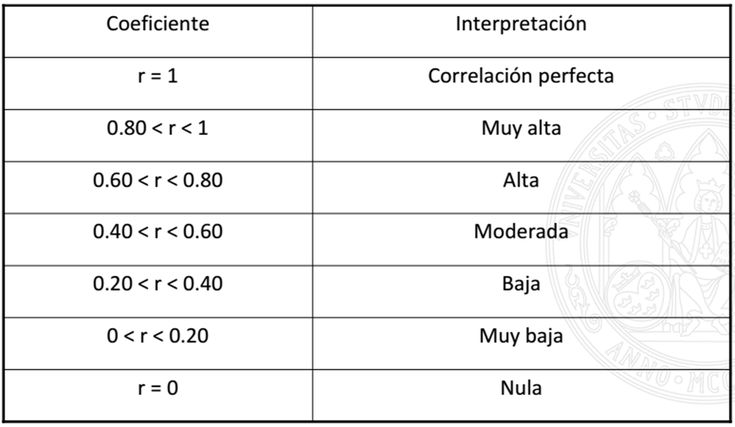

In [183]:
data.corr()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
e_magic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
e_cblp,NaN,1.000000,0.660911,0.658889,0.612555,0.738562,-0.126543,0.383272,0.499692,0.344250,...,0.032012,NaN,-0.012362,-0.013954,-0.003183,-0.000563,0.000085,-0.001265,0.359297,-0.000019
e_cp,NaN,0.660911,1.000000,0.855558,0.631609,0.679133,-0.134968,0.465528,0.589448,0.484143,...,0.024693,NaN,-0.016699,-0.018171,-0.004110,-0.000716,0.002131,0.001676,0.279214,0.000095
e_crlc,NaN,0.658889,0.855558,1.000000,0.738859,0.793224,-0.147379,0.589649,0.625598,0.548313,...,0.022481,NaN,-0.018810,-0.018811,-0.003410,-0.000604,0.002046,0.001344,0.324521,0.000651
e_cparhdr,NaN,0.612555,0.631609,0.738859,1.000000,0.866721,-0.154192,0.246532,0.618349,0.568015,...,0.017369,NaN,-0.018842,-0.019757,-0.003320,-0.000570,0.000035,-0.001346,0.299377,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ImageDirectoryEntryExport,NaN,-0.000563,-0.000716,-0.000604,-0.000570,-0.000580,0.001919,-0.000247,-0.000517,-0.000421,...,0.003285,NaN,0.000809,0.003010,0.007569,1.000000,0.033720,0.023040,-0.000114,0.002499
ImageDirectoryEntryImport,NaN,0.000085,0.002131,0.002046,0.000035,0.000198,0.009798,-0.000758,0.001010,0.000445,...,0.032340,NaN,0.033719,0.050796,0.041997,0.033720,1.000000,0.227299,0.001845,0.011594
ImageDirectoryEntryResource,NaN,-0.001265,0.001676,0.001344,-0.001346,-0.001499,0.005752,-0.000873,-0.000875,-0.000714,...,0.020728,NaN,0.023624,0.049349,0.029397,0.023040,0.227299,1.000000,0.000513,0.008297
ImageDirectoryEntryException,NaN,0.359297,0.279214,0.324521,0.299377,0.384137,-0.099161,-0.000345,0.283131,-0.000617,...,0.020704,NaN,-0.015547,-0.013903,-0.000445,-0.000114,0.001845,0.000513,1.000000,0.004849


In [184]:
data.corr()['Malware']

e_magic                              NaN
e_cblp                          0.026080
e_cp                            0.027919
e_crlc                          0.023756
e_cparhdr                       0.022779
                                  ...   
ImageDirectoryEntryExport       0.004624
ImageDirectoryEntryImport       0.011241
ImageDirectoryEntryResource     0.016991
ImageDirectoryEntryException    0.011257
ImageDirectoryEntrySecurity    -0.003282
Name: Malware, Length: 76, dtype: float64

La variable que nos interesa es el target (y), que en nuestro caso es "Malware". Verificamos la correlacion para decidir que columnas utilizar y cuales eliminar

Se elimina las columnas con una correlacion baja

In [185]:
data.drop(['ImageDirectoryEntryExport', 'e_magic', 'ImageDirectoryEntrySecurity', 'Magic', 'SectionsLength',
           'SectionMinVirtualsize', 'SuspiciousImportFunctions','SuspiciousNameSection','SectionsLength','SectionMinEntropy',
            'SectionMaxEntropy','SectionMinRawsize','SectionMaxRawsize','SectionMinVirtualsize','SectionMaxVirtualsize','SectionMaxPhysical','SectionMinPhysical',
            'SectionMaxVirtual','SectionMinVirtual','SectionMaxPointerData','SectionMinPointerData','SectionMaxChar','SectionMainChar',
            'DirectoryEntryImport','DirectoryEntryImportSize','DirectoryEntryExport','ImageDirectoryEntryExport','ImageDirectoryEntryImport',
            'ImageDirectoryEntryResource','ImageDirectoryEntrySecurity','ImageDirectoryEntryException'], axis=1, inplace=True)
data.head()


,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware
0,144,3,0,4,0,65535,0,184,0,0,...,274432,2,32832,524288,8192,1048576,4096,0,16,1
1,144,3,0,4,0,65535,0,184,0,0,...,442368,2,33088,1048576,4096,1048576,4096,0,16,1
2,144,3,0,4,0,65535,0,184,0,0,...,49152,2,0,1048576,4096,1048576,69632,0,528,1
3,144,3,0,4,0,65535,0,184,0,0,...,1032192,2,32768,2097152,4096,1048576,4096,0,16,1
4,144,3,0,4,0,65535,0,184,0,0,...,110592,2,0,2097152,4096,1048576,4096,0,16,1


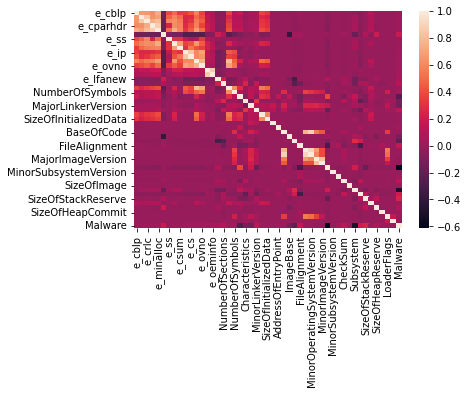

In [186]:
sns.heatmap(data.corr())
plt.show()

# Oversampling y Undersampling

El numero de registros de archivos benignos (0) no tiene una diferencia significativa al de parhivos infectados o peligrosos(1). Por lo que no se realizo el undersampling o oversampling.

* El oversampling incrementa el tamaño de la menor muestra a una igual o proporcional a la de mayor tamaño. 
* Mientras que el undersampling elimina filas del que tenga mayor cantidad de datos

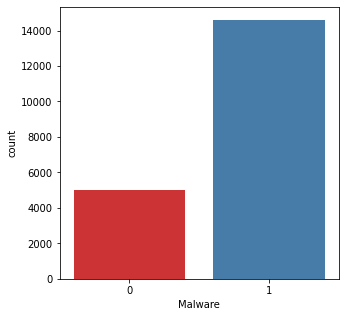

In [187]:
#Mostramos la cantidad de archivos que son o no maliciosos
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="Malware", data=data, palette="Set1")
plt.show()

# Arbol de clasificacion
*   Preparar el conjunto de datos
*   Dividir el conjunto de datos 


Necesitamos dividir nuestros datos en dos partes:


1.   Para el entrenamiento del modelo
2.   Para las pruebas del modelo

Se debe separar el target del resto de los datos(features)

In [188]:
x = data.drop(['Malware'], axis = 1)
y = data['Malware']

In [189]:
x

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,144,3,0,4,0,65535,0,184,0,0,...,295281,274432,2,32832,524288,8192,1048576,4096,0,16
1,144,3,0,4,0,65535,0,184,0,0,...,0,442368,2,33088,1048576,4096,1048576,4096,0,16
2,144,3,0,4,0,65535,0,184,0,0,...,0,49152,2,0,1048576,4096,1048576,69632,0,528
3,144,3,0,4,0,65535,0,184,0,0,...,14174816,1032192,2,32768,2097152,4096,1048576,4096,0,16
4,144,3,0,4,0,65535,0,184,0,0,...,0,110592,2,0,2097152,4096,1048576,4096,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,144,3,0,4,0,65535,0,184,0,0,...,28252,36864,3,33088,262144,8192,1048576,4096,0,16
19607,144,3,0,4,0,65535,0,184,0,0,...,18898230,18882560,2,33088,1048576,4096,1048576,4096,0,16
19608,0,0,0,0,0,0,0,0,0,0,...,0,278528,3,34112,0,0,0,0,0,16
19609,144,3,0,4,0,65535,0,184,0,0,...,370840,376832,2,320,262144,4096,1048576,4096,0,16


In [190]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=11, stratify=y)

In [192]:
data.head(10)

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware
0,144,3,0,4,0,65535,0,184,0,0,...,274432,2,32832,524288,8192,1048576,4096,0,16,1
1,144,3,0,4,0,65535,0,184,0,0,...,442368,2,33088,1048576,4096,1048576,4096,0,16,1
2,144,3,0,4,0,65535,0,184,0,0,...,49152,2,0,1048576,4096,1048576,69632,0,528,1
3,144,3,0,4,0,65535,0,184,0,0,...,1032192,2,32768,2097152,4096,1048576,4096,0,16,1
4,144,3,0,4,0,65535,0,184,0,0,...,110592,2,0,2097152,4096,1048576,4096,0,16,1
5,80,2,0,4,15,65535,0,184,0,0,...,81920,2,0,1048576,16384,1048576,4096,0,16,1
6,144,3,0,4,0,65535,0,184,0,0,...,331776,2,33088,1048576,4096,1048576,4096,0,16,1
7,80,2,0,4,15,65535,0,184,0,0,...,81920,2,32768,1048576,16384,1048576,4096,0,16,1
8,144,3,0,4,0,65535,0,184,0,0,...,647168,2,33024,1048576,4096,1048576,4096,0,16,1
9,144,3,0,4,0,65535,0,184,0,0,...,344064,2,34112,1048576,4096,1048576,4096,0,16,1


In [193]:
x  #features

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,144,3,0,4,0,65535,0,184,0,0,...,295281,274432,2,32832,524288,8192,1048576,4096,0,16
1,144,3,0,4,0,65535,0,184,0,0,...,0,442368,2,33088,1048576,4096,1048576,4096,0,16
2,144,3,0,4,0,65535,0,184,0,0,...,0,49152,2,0,1048576,4096,1048576,69632,0,528
3,144,3,0,4,0,65535,0,184,0,0,...,14174816,1032192,2,32768,2097152,4096,1048576,4096,0,16
4,144,3,0,4,0,65535,0,184,0,0,...,0,110592,2,0,2097152,4096,1048576,4096,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,144,3,0,4,0,65535,0,184,0,0,...,28252,36864,3,33088,262144,8192,1048576,4096,0,16
19607,144,3,0,4,0,65535,0,184,0,0,...,18898230,18882560,2,33088,1048576,4096,1048576,4096,0,16
19608,0,0,0,0,0,0,0,0,0,0,...,0,278528,3,34112,0,0,0,0,0,16
19609,144,3,0,4,0,65535,0,184,0,0,...,370840,376832,2,320,262144,4096,1048576,4096,0,16


In [194]:
y #target

0        1
1        1
2        1
3        1
4        1
        ..
19606    0
19607    0
19608    0
19609    0
19610    0
Name: Malware, Length: 19611, dtype: int64

Se usaran los datos de entrenamiento y prueba en X_train, y_train, X_test, y_test

In [195]:
x_train_1 = x_train
y_train_1 = y_train
y_test_1 = y_test
x_test_1 = x_test

Se crea un objeto de DecisionTreeClassifier

In [196]:
clasificador = DecisionTreeClassifier(criterion="gini", max_depth=10, random_state=15)

In [197]:
clasificador = clasificador.fit(x_train_1, y_train_1) #Entrenamiento

In [198]:
y_pred_1 = clasificador.predict(x_test_1) #Prediccion de respuesta con datos de prueba

In [199]:
print("Precision:", metrics.accuracy_score(y_test_1, y_pred_1)) #Precision del modelo

Precision: 0.978831891223733


**Indice de gini**

In [200]:
# Calcular el indice de gini del target "Malware"
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = y_test_1.value_counts()
print(f'Numeto de datos en cada clase del target is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nImpuridad de gini {gini_class:.3f}')


Numeto de datos en cada clase del target is:
1    4818
0    1654
Name: Malware, dtype: int64

Impuridad de gini 0.381


In [201]:
# Calcular la importancia de los atributos
# Se empezara desde el atributo de mayor importancia
pd.DataFrame({'Atributo':x.columns,
              'importancia':clasificador.feature_importances_}).sort_values('importancia',
                                                                      ascending=False).head()

,Atributo,importancia
35,MajorSubsystemVersion,0.599903
40,Subsystem,0.160985
21,MajorLinkerVersion,0.148349
38,CheckSum,0.020377
41,DllCharacteristics,0.012972


**Visualizacion**

In [202]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

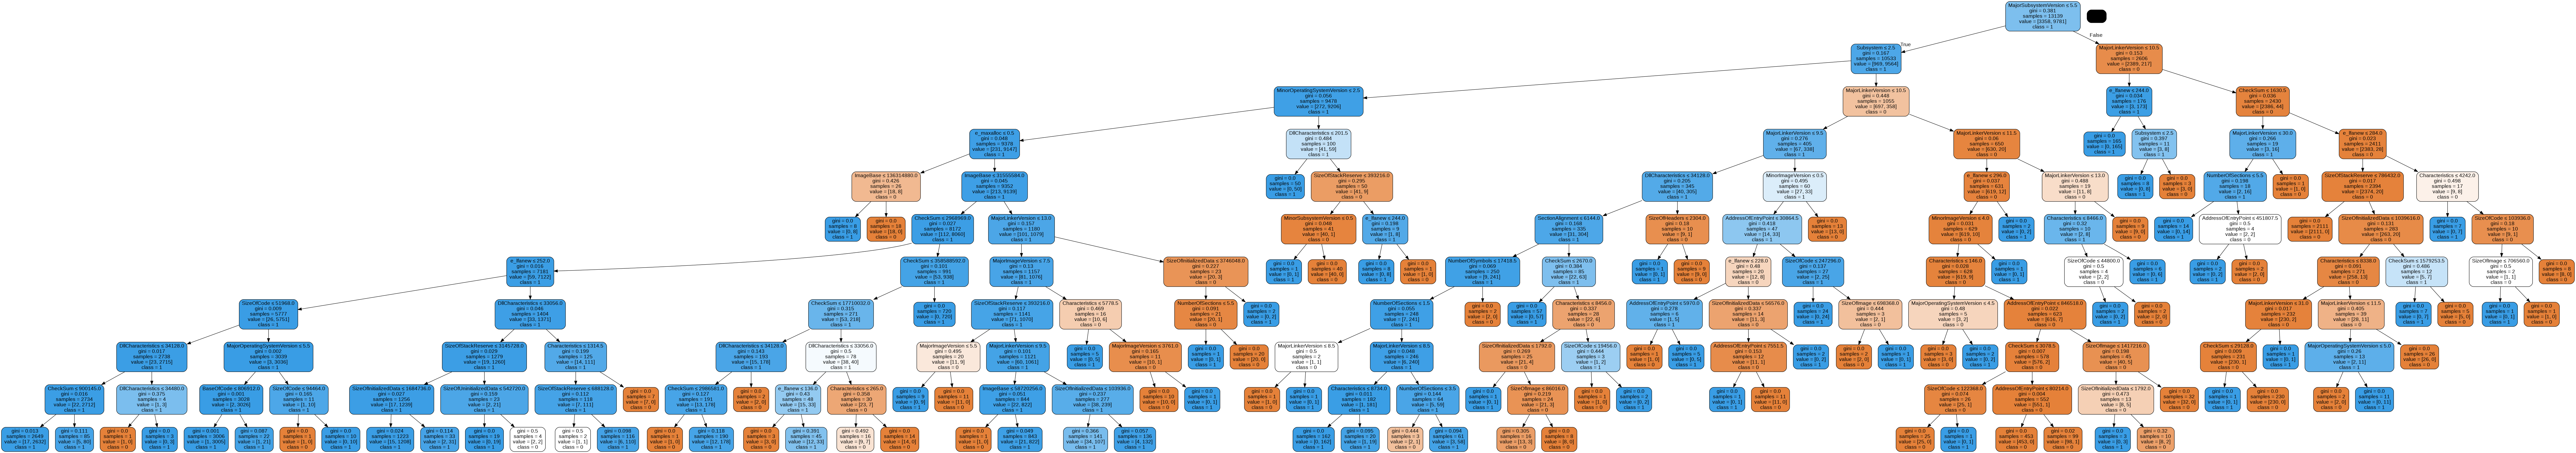

In [203]:
dot_data = export_graphviz(clasificador,
                           out_file=None,  
                           filled=True,
                           rounded=True,
                           special_characters=True,
                           feature_names = x.columns,
                           class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Metricas de clasificacion - Arbol de decision


0. Matriz de confusion

In [204]:
cm_1 = metrics.confusion_matrix(y_test_1, y_pred_1, labels=[0, 1])
df_cm_1 = pd.DataFrame(cm_1)
df_cm_1.rename(columns={0:'Benignos', 1:'Malware'}, index={0:'Benignos', 1:'Malware'}, inplace=True)
df_cm_1

,Benignos,Malware
Benignos,1541,113
Malware,24,4794


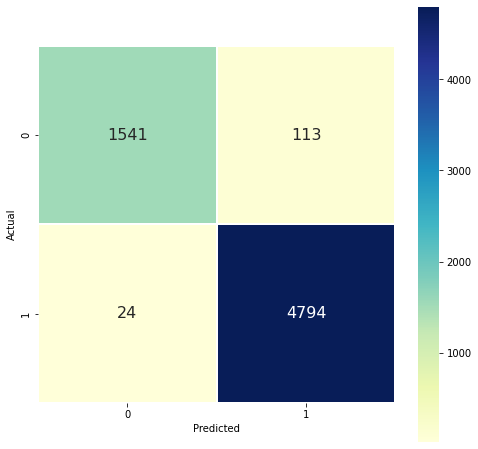

In [205]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm_1, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

plt.show()

In [206]:
TP_1 = cm_1[0,0]
TN_1 = cm_1[1,1]
FP_1 = cm_1[0,1]
FN_1 = cm_1[1,0]
print('\nTrue Positives(TP) = ', TP_1)

print('\nTrue Negatives(TN) = ', TN_1)

print('\nFalsos Positives(FP) = ', FP_1)

print('\nFalsos Negatives(FN) = ', FN_1)


True Positives(TP) =  1541

True Negatives(TN) =  4794

Falsos Positives(FP) =  113

Falsos Negatives(FN) =  24


1. Exactitud. Se refiere a lo cerca que está el resultado de una medición del valor verdadero
TP + TN / TP + TN + FP + FN

In [207]:
exac= (TP_1 + TN_1) / (TP_1 + TN_1 + FP_1 + FN_1)
print("Exactitud = "+str(exac*100)+"%")

Exactitud = 97.88318912237331%


2. Precision. Se refiere a la dispersión del conjunto de valores obtenidos a partir de mediciones repetidas de una magnitud
TP / TP + FP

In [208]:
pre = TP_1 / (TP_1 + FP_1)
print("Precision = "+str(pre*100)+"%")

Precision = 93.16807738814994%


3. Sensibilidad. Es la proporción de casos positivos que fueron correctamente identificadas por el algoritmo. TP / (TP + FN)

In [209]:
sensibilidad = TP_1 / (TP_1 + FN_1)
print("Sensibilidad = "+str(sensibilidad*100)+"%")

Sensibilidad = 98.4664536741214%


4. Especificidad. Se trata de los casos negativos que el algoritmo ha clasificado correctamente. Expresa cuan bien puede el modelo detectar esa clase.
TN / TN + FP

In [210]:
esp = TN_1 / (TN_1 + FP_1)
print("Tasa negativa real = "+str(esp*100)+"%")

Tasa negativa real = 97.69716731200326%


5. tasa de clasificación errónea. Representa la cantidad de clasificaciones incorrectas obtuvo el modelo. FP + FN / TP + TN + FP + FN

In [211]:
tce = (FP_1 + FN_1) / (TP_1 + TN_1 + FP_1 + FN_1)
print("Tasa de clasificacion erronea = "+str(tce*100)+"%")

Tasa de clasificacion erronea = 2.1168108776267%


# Pruebas con archivos ejecutables


Para poder realizar pruebas con archivos ejecutables es necesario obtener las cabeceras de estos, para lo cual utilizaremos la libreria "PEfile" de python que realiza justamente eso.

Los ejecutable que utilizaremos son un simple programa de hola mundo escrito en C y un instalador de Microsoft, ambos compilado en .exe. Los cuales se encuentran alojados en google drive

In [ ]:
!pip install pefile

In [ ]:
# Descargar los archivos desde drive
!gdown 1pS0nzs8m3UbnsQMwGF4ch-JjHNe00Gyv
!gdown 1IbJvlQ-3xNj2Iz3Jd2FKl_JbuUwFEG5_
import zipfile
import os
# Extraer los archivos
zip_ref = zipfile.ZipFile("./hello.zip", 'r')
zip_ref.extractall()
zip_ref = zipfile.ZipFile("./DXSETUP.zip", 'r')
zip_ref.extractall()
zip_ref.close()


Una vez descargado el archivo se utiliza pefile para obtener las cabeceras, este metodo recibe como parametro la ubicacion del archivo.

In [214]:
import pefile
import pandas as pd

def get_cabeceras(ubicacion):
  # Obtenemos las cabeceras
  pe = pefile.PE(ubicacion, fast_load=True)
  dump = pe.dump_dict()
  dos_headers = dump["DOS_HEADER"]
  file_headers = dump["FILE_HEADER"]
  opt_headers = dump["OPTIONAL_HEADER"]

  # ELiminamos los datos que no nos sirven
  pe_sections = dump["PE Sections"]
  directories = dump["Directories"]

  dos_headers.pop('Structure', None)
  dos_headers.pop('e_res', None)
  dos_headers.pop('e_res2', None)
  dos_headers.pop('e_magic', None)
  
  file_headers.pop('Structure', None)
  file_headers.pop('Machine', None)
  file_headers.pop('TimeDateStamp', None)

  opt_headers.pop('Magic', None)
  opt_headers.pop('BaseOfData', None)
  opt_headers.pop('Structure', None)
  opt_headers.pop('Reserved1', None)

  headers ={}
  # Obtenemos los valores de las cabeceras y las guardamos en un diccionario
  for d in dos_headers:
      headers[d]=dos_headers[d]["Value"]
  for f in file_headers:
      headers[f]=file_headers[f]["Value"]
  for o in opt_headers:
      headers[o]=opt_headers[o]["Value"]
  return(headers)
# Llamamos al metodo, y convertimos el resultado en un dataframe
cabeceras_c = get_cabeceras('./hello.exe')
cabeceras_micro = get_cabeceras('./DXSETUP.exe')
df = pd.DataFrame.from_dict([cabeceras_c])
df1 = pd.DataFrame.from_dict([cabeceras_micro])
print(df) 
print(df1)

   e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  \
0     144     3       0          4           0       65535     0   184   

   e_csum  e_ip  ...  SizeOfHeaders  CheckSum  Subsystem  DllCharacteristics  \
0       0     0  ...           1024     56070          3                   0   

   SizeOfStackReserve  SizeOfStackCommit  SizeOfHeapReserve  SizeOfHeapCommit  \
0             2097152               4096            1048576              4096   

   LoaderFlags  NumberOfRvaAndSizes  
0            0                   16  

[1 rows x 48 columns]
   e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  e_sp  \
0     144     3       0          4           0       65535     0   184   

   e_csum  e_ip  ...  SizeOfHeaders  CheckSum  Subsystem  DllCharacteristics  \
0       0     0  ...           1024    537460          2               33088   

   SizeOfStackReserve  SizeOfStackCommit  SizeOfHeapReserve  SizeOfHeapCommit  \
0              262144               8

In [215]:
NO_MALIGNO = " \033[92mPuede ser un archivo benigno\033[0m"
MALIGNO = " \033[91mPuede ser un archivo maligno\033[0m"
prediction_tree = clasificador.predict(df)
prediction_tree_1 = clasificador.predict(df1)
P_TREE = f"Prediccion arbol para ejecutable C: {prediction_tree} "
P_TREE_1 = f"Prediccion arbol para ejecutable de Microsoft: {prediction_tree_1} "
print("\nModelo Arbol de Clasificacion")
if prediction_tree == 0:
  P_TREE += NO_MALIGNO
else:
  P_TREE += MALIGNO

if prediction_tree_1 == 0:
  P_TREE_1 += NO_MALIGNO
else:
  P_TREE_1 += MALIGNO
print(P_TREE)
print(P_TREE_1)


Modelo Arbol de Clasificacion
Prediccion arbol para ejecutable C: [1]  Puede ser un archivo maligno
Prediccion arbol para ejecutable de Microsoft: [0]  Puede ser un archivo benigno


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Comparando el resultado con la pagina www.virustotal.com , que utiliza PEfile para el analisi de archivos, comprobamos que de igual manera el archivo de c fue detectado como maligno por algunos programas antivirus. Aunque existe la posibilidad de que se trate de un falso positivo ya que varios antivirus lo detectaron como un archivo benigno


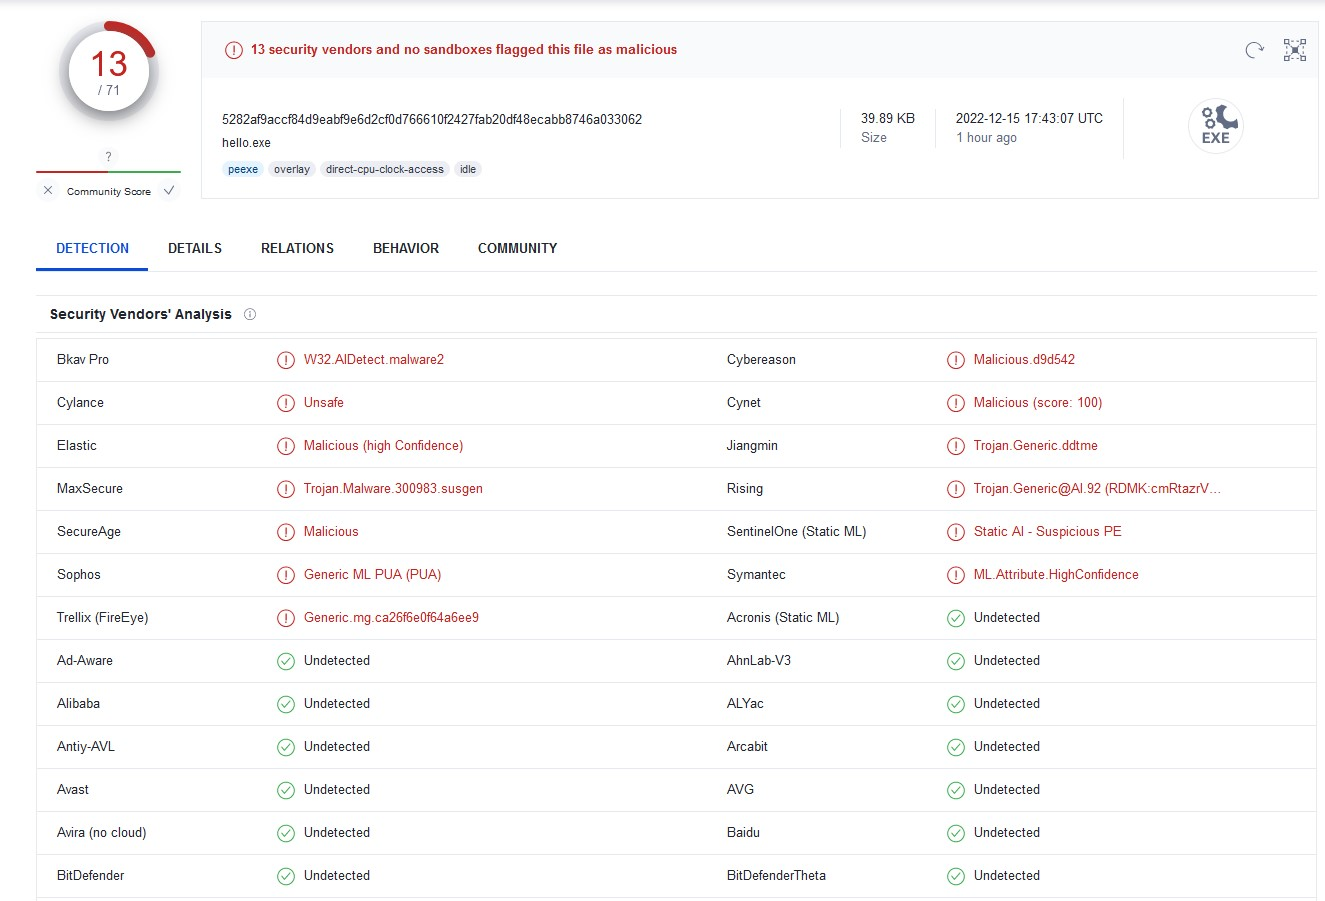



Mientras que el archivo de Microsoft fue detectado como no malicioso
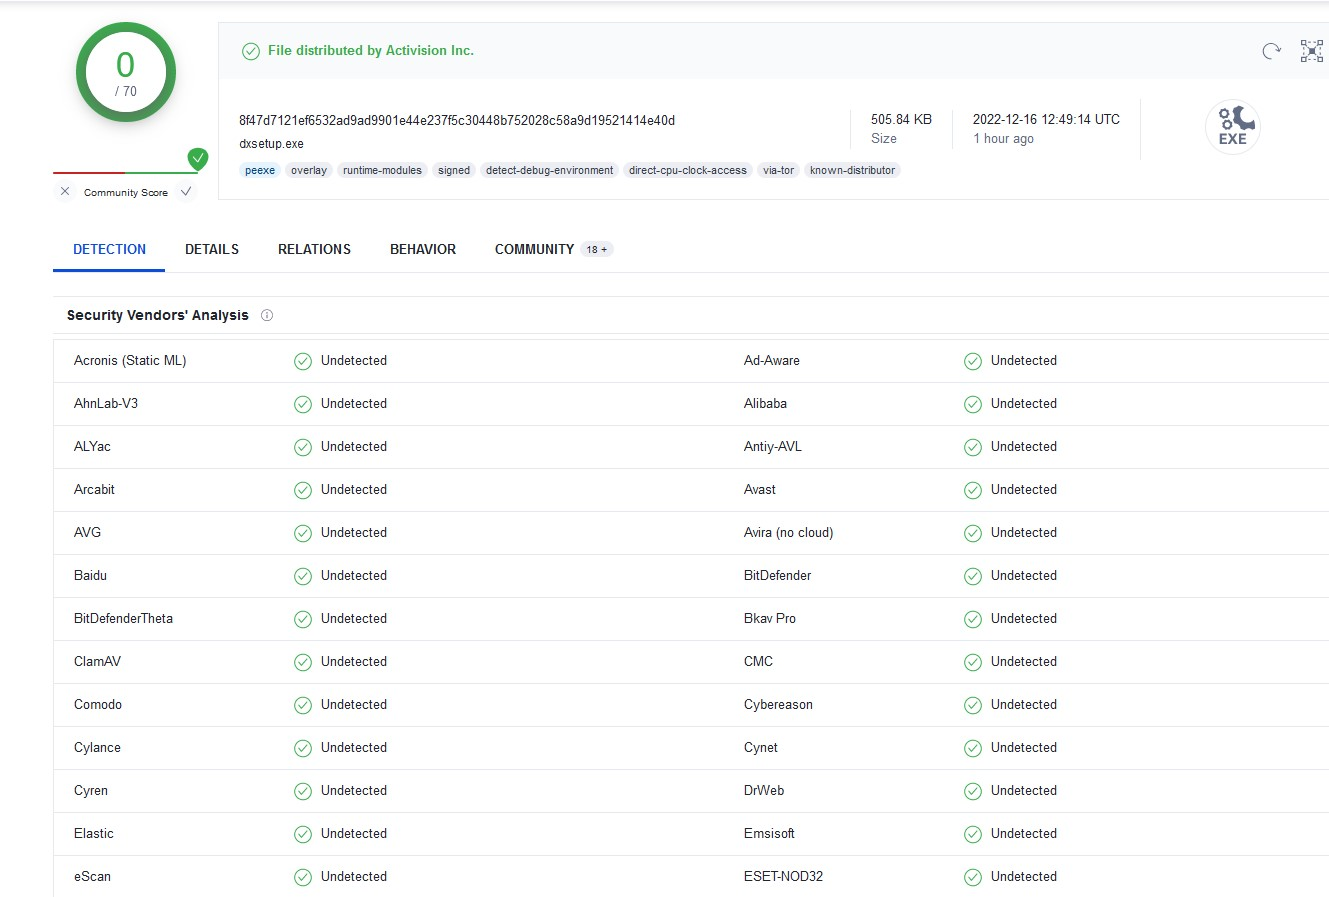